# Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv('/content/drive/MyDrive/PN14/bank_clients_transactions.csv')

Mounted at /content/drive


In [ ]:

df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Приведение столбцов к стилю camel_case

In [ ]:
df.columns = [
    "transactionID",
    "customerID",
    "customerDOB",
    "custGender",
    "custLocation",
    "custAccountBalance",
    "transactionDate",
    "transactionTime",
    "transactionAmountINR",
]

print(df.head())

  transactionID customerID customerDOB custGender custLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   custAccountBalance transactionDate  transactionTime  transactionAmountINR  
0            17819.05          2/8/16           143207                  25.0  
1             2270.69          2/8/16           141858               27999.0  
2            17874.44          2/8/16           142712                 459.0  
3           866503.21          2/8/16           142714                2060.0  
4             6714.43          2/8/16           181156                1762.5  


# Приведение типов данных

In [ ]:
#привести дату к типу datetime

# Преобразуем даты в формат datetime
df["customerDOB"] = pd.to_datetime(df["customerDOB"], format="%d/%m/%y", errors="coerce")
df["transactionDate"] = pd.to_datetime(df["transactionDate"], format="%d/%m/%y", errors="coerce")

# Проверка типов данных
print(df.dtypes)

# Просмотр первых строк для проверки
print(df.head())

transactionID                   object
customerID                      object
customerDOB             datetime64[ns]
custGender                      object
custLocation                    object
custAccountBalance             float64
transactionDate         datetime64[ns]
transactionTime                  int64
transactionAmountINR           float64
dtype: object
  transactionID customerID customerDOB custGender custLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   custAccountBalance transactionDate  transactionTime  transactionAmountINR  
0            17819.05      2016-08-02           143207                  25.0  
1             2270.69      2016-08-02           141858               27999.0  
2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   transactionID         1048567 non-null  object        
 1   customerID            1048567 non-null  object        
 2   customerDOB           987831 non-null   datetime64[ns]
 3   custGender            1047467 non-null  object        
 4   custLocation          1048416 non-null  object        
 5   custAccountBalance    1046198 non-null  float64       
 6   transactionDate       1048567 non-null  datetime64[ns]
 7   transactionTime       1048567 non-null  int64         
 8   transactionAmountINR  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [ ]:
# Удаляем строки с дублями
df = df.drop_duplicates()

# Удаляем строки с пропусками
df = df.dropna()

# Проверяем результат
print(df)

        transactionID customerID customerDOB custGender   custLocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-04-08          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-03-05          M           PUNE   

         custAccountBalance transactionDate  transactionTime  \
0                  17819.05      2016-08-02    

# Исследовательский анализ данных

In [ ]:
df

,transactionID,customerID,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionAmountINR
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [ ]:
# сколько уникальных клиентов?

unique_customers = df["customerID"].nunique()

print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 839081


In [ ]:
# какое количество транзакций было совершено?

total_transactions = len(df)

print(f"Общее количество транзакций: {total_transactions}")

Общее количество транзакций: 985322


In [ ]:
# сколько в среднем транзакций приходится на одного клиента?
total_transactions = len(df)  # Общее количество транзакций
unique_customers = df["customerID"].nunique()  # Количество уникальных клиентов

average_transactions_per_customer = total_transactions / unique_customers
print(f"Среднее количество транзакций на клиента: {average_transactions_per_customer:.2f}")

Среднее количество транзакций на клиента: 1.17


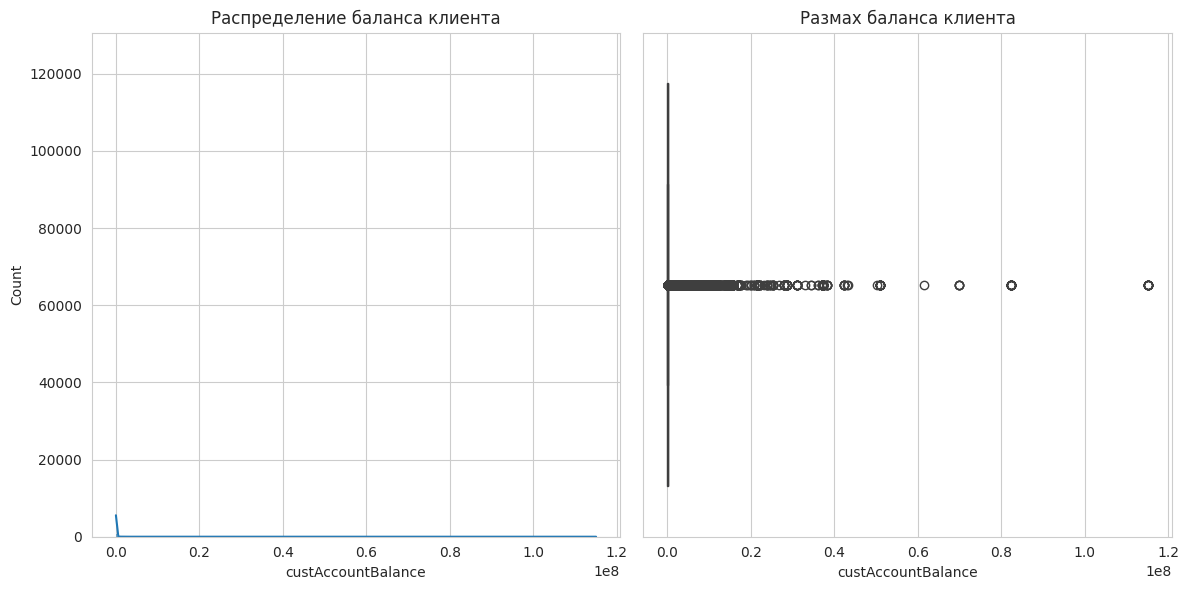

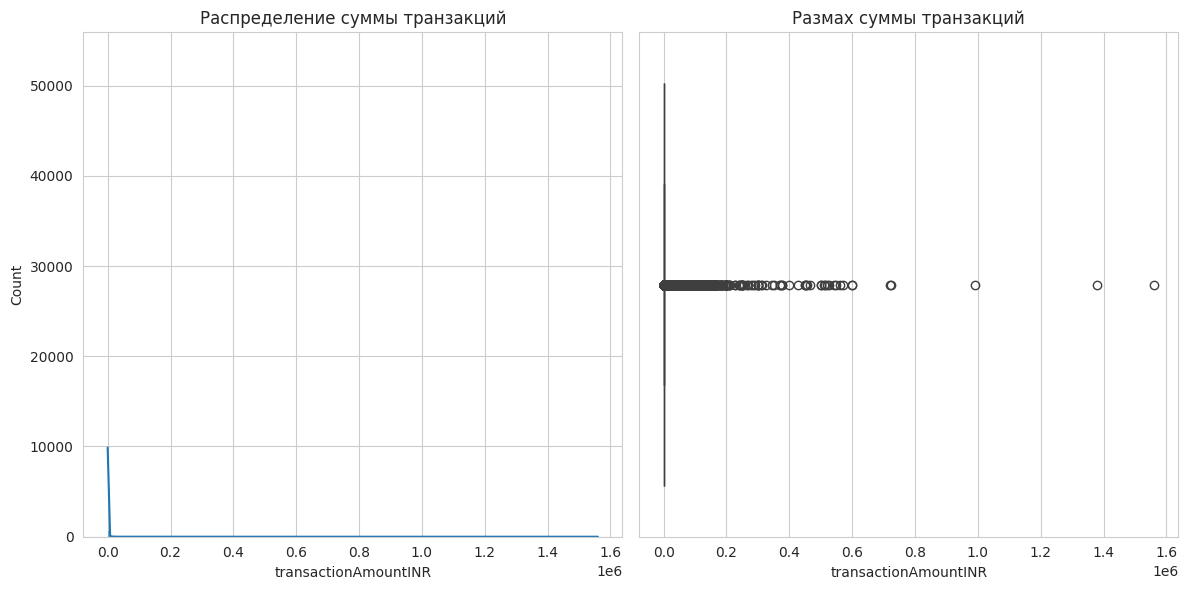

In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount

sns.set_style("whitegrid")

# Распределение баланса клиента
plt.figure(figsize=(12, 6))

# Гистограмма для custAccountBalance
plt.subplot(1, 2, 1)
sns.histplot(df['custAccountBalance'], kde=True, bins='auto')  # Автоматическое определение корзин
plt.title('Распределение баланса клиента')

# Ящик с усами для custAccountBalance
plt.subplot(1, 2, 2)
sns.boxplot(x=df['custAccountBalance'])
plt.title('Размах баланса клиента')

plt.tight_layout()
plt.show()

# Распределение суммы транзакций
plt.figure(figsize=(12, 6))

# Гистограмма для transactionAmountINR
plt.subplot(1, 2, 1)
sns.histplot(df['transactionAmountINR'], kde=True, bins='auto')  # Автоматическое определение корзин
plt.title('Распределение суммы транзакций')

# Ящик с усами для transactionAmountINR
plt.subplot(1, 2, 2)
sns.boxplot(x=df['transactionAmountINR'])
plt.title('Размах суммы транзакций')

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)


Index(['transactionID', 'customerID', 'customerDOB', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionAmountINR'],
      dtype='object')


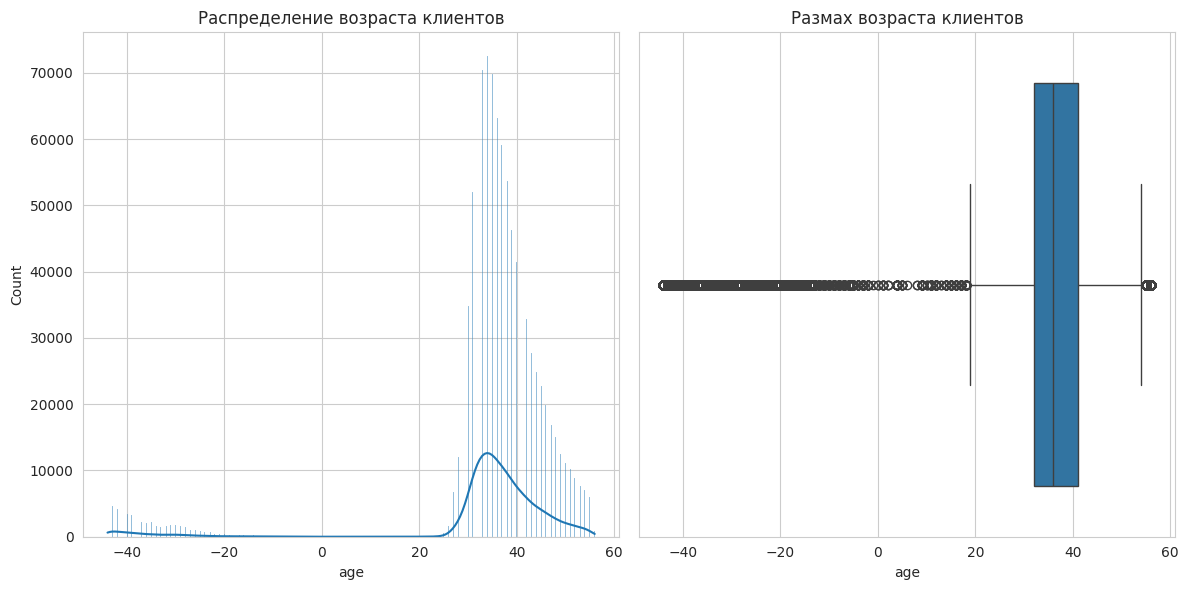

In [ ]:
# изучить возраст клиентов (визуализировать)

# Преобразуем дату рождения в datetime
df['customerDOB'] = pd.to_datetime(df['customerDOB'])

# Рассчитываем возраст
current_date = datetime.now()
df['age'] = (current_date - df['customerDOB']).dt.days // 365

# Визуализируем распределение возраста клиентов
plt.figure(figsize=(12, 6))

# Гистограмма для возраста клиентов
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins='auto')  # Автоматическое определение корзин
plt.title('Распределение возраста клиентов')

# Ящик с усами для возраста клиентов
plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Размах возраста клиентов')

plt.tight_layout()
plt.show()

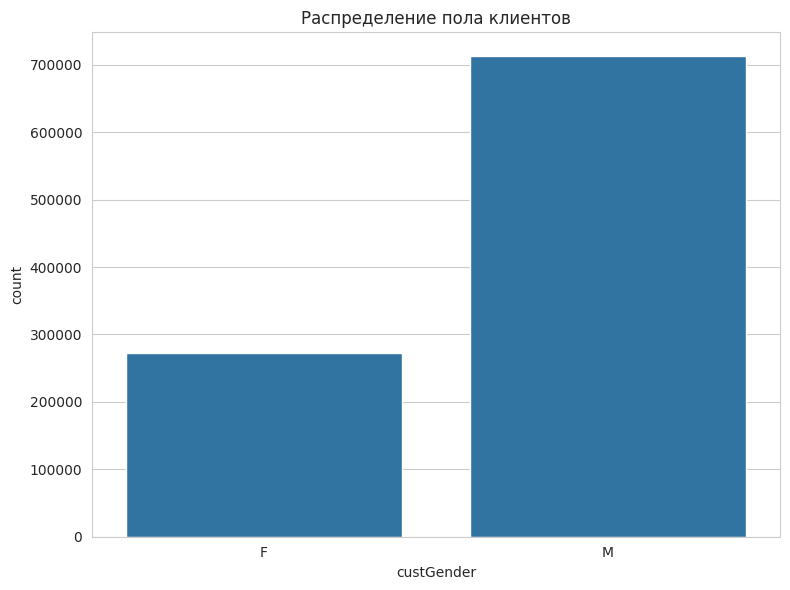

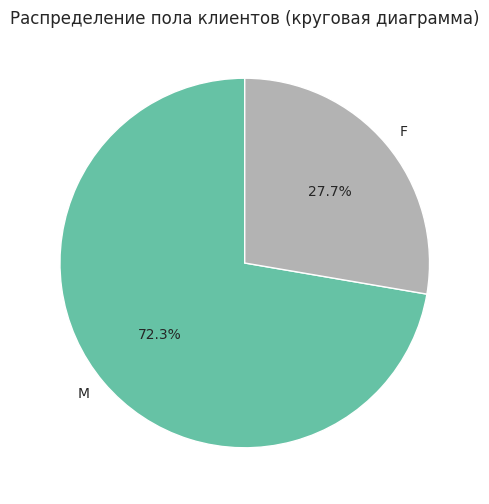

In [ ]:
# изучить пол клиентов (визуализировать)

# Визуализируем распределение пола клиентов
plt.figure(figsize=(8, 6))

# Гистограмма для пола клиентов (countplot)
sns.countplot(x='custGender', data=df)
plt.title('Распределение пола клиентов')

plt.tight_layout()
plt.show()

# Круговая диаграмма для пола клиентов
gender_counts = df['custGender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Распределение пола клиентов (круговая диаграмма)')
plt.ylabel('')  # Убираем метку на оси y
plt.show()

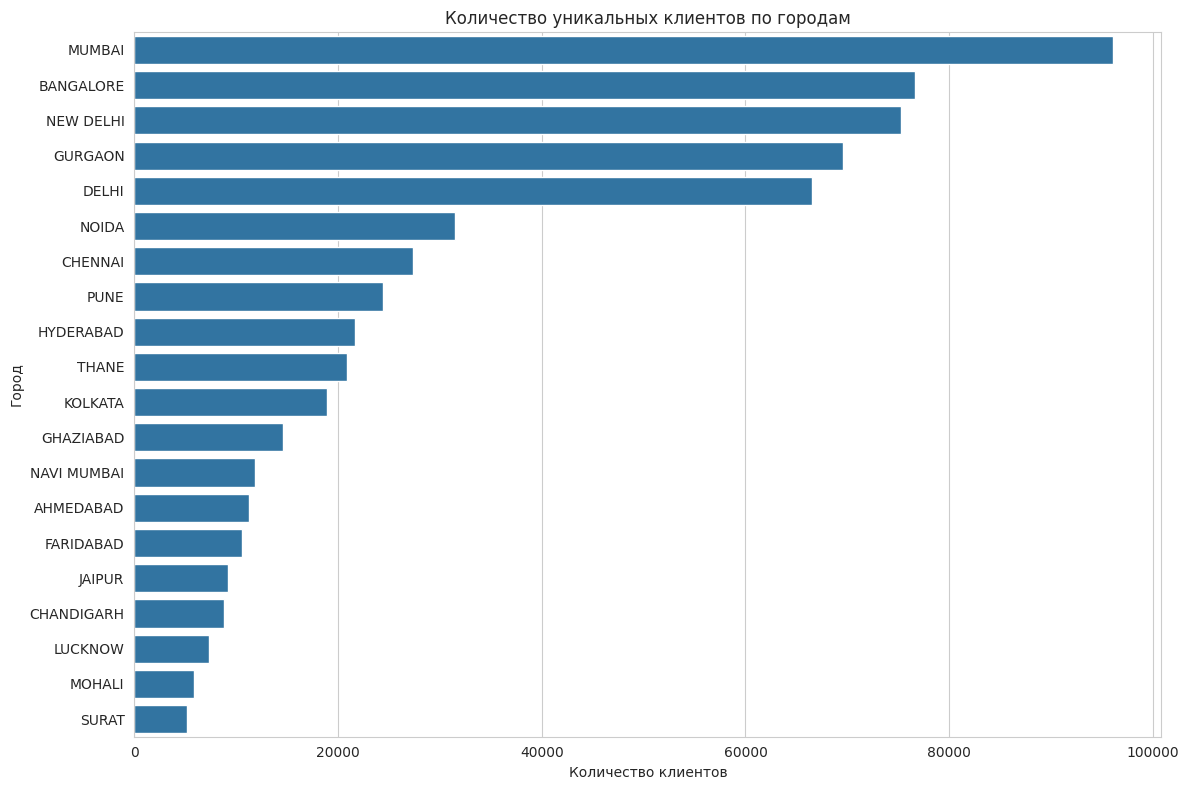

In [ ]:
# изучить место жительства клиентов (визуализировать)

# Подсчитываем количество уникальных клиентов в каждом городе
city_customer_counts = df.groupby('custLocation')['customerID'].nunique().sort_values(ascending=False)

# Ограничим количество городов до топ-20 (если городов слишком много)
top_cities = city_customer_counts.head(20)

# Визуализируем распределение уникальных клиентов по городам
plt.figure(figsize=(12, 8))

# Столбчатая диаграмма для количества уникальных клиентов по городам (города по оси Y)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title('Количество уникальных клиентов по городам')
plt.xlabel('Количество клиентов')
plt.ylabel('Город')

# Поворот меток на оси Y, чтобы они не слипались
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

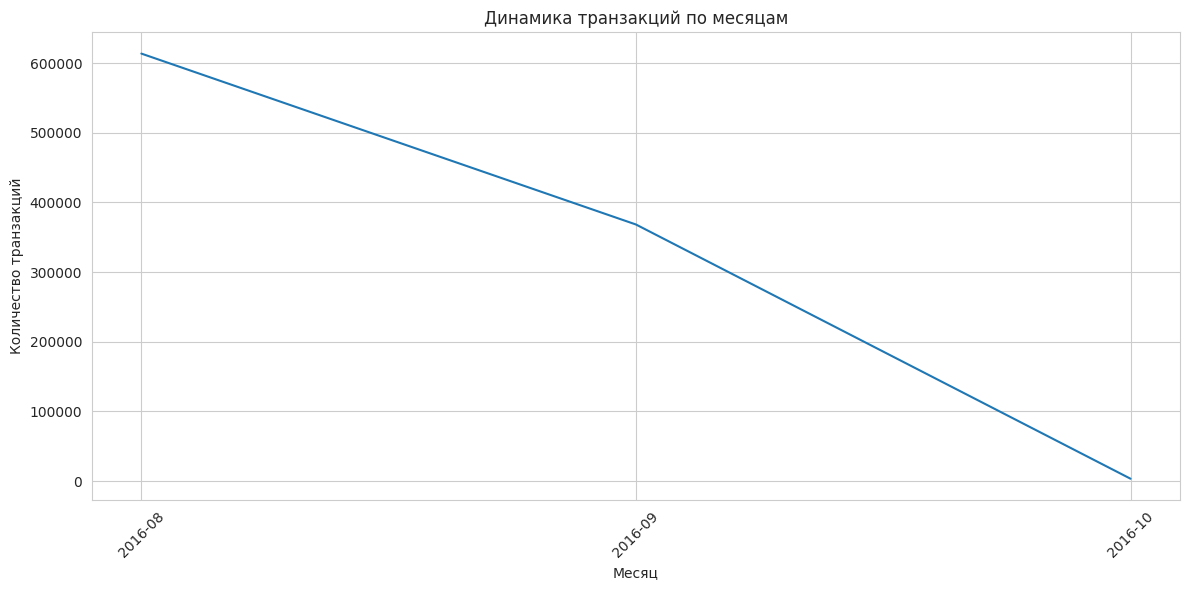

In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

# Преобразуем столбец transactionDate в тип datetime
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Группируем данные по месяцам и считаем количество транзакций
transaction_counts = df.groupby(df['transactionDate'].dt.to_period('M'))['transactionID'].count()

# Визуализируем динамику транзакций по месяцам
plt.figure(figsize=(12, 6))

# Линейный график для динамики транзакций по месяцам
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values)
plt.title('Динамика транзакций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')

plt.xticks(rotation=45)  # Поворот меток на оси X для лучшего восприятия
plt.tight_layout()
plt.show()

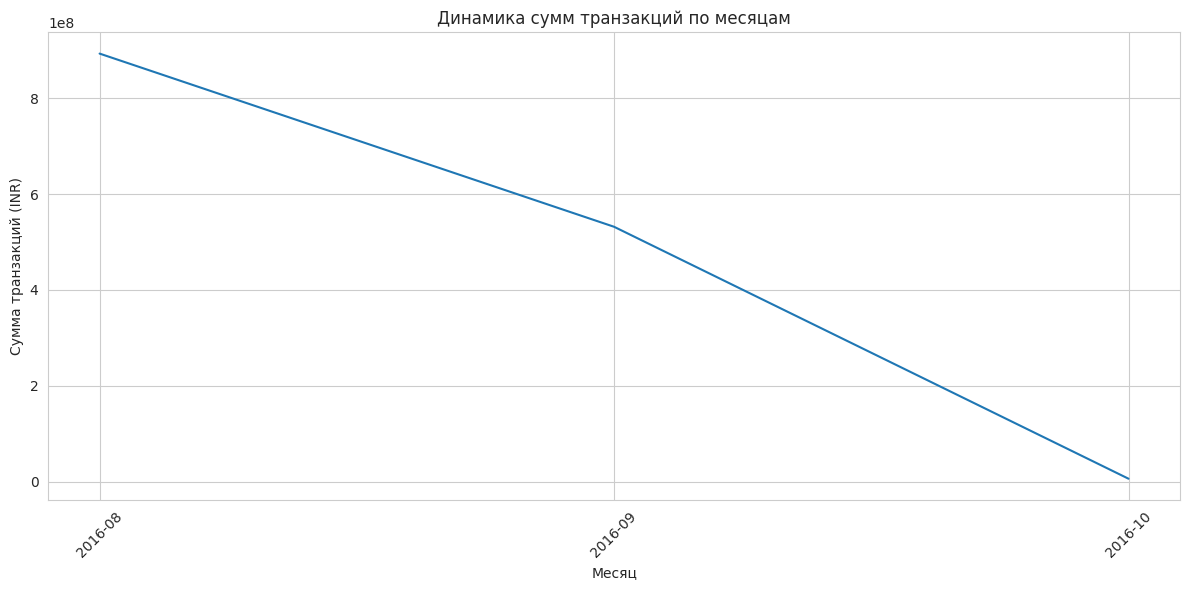

In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

# Преобразуем столбец transactionDate в тип datetime
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Группируем данные по месяцам и суммируем значения по transactionAmountINR
monthly_sales = df.groupby(df['transactionDate'].dt.to_period('M'))['transactionAmountINR'].sum()

# Визуализируем динамику сумм транзакций по месяцам
plt.figure(figsize=(12, 6))

# Линейный график для динамики сумм транзакций по месяцам
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Динамика сумм транзакций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма транзакций (INR)')

plt.xticks(rotation=45)  # Поворот меток на оси X для лучшего восприятия
plt.tight_layout()
plt.show()

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [ ]:
# Преобразуем дату рождения в формат datetime
df["customerDOB"] = pd.to_datetime(df["customerDOB"], errors="coerce")

# Вычисляем возраст клиентов на момент транзакции
df["transactionDate"] = pd.to_datetime(df["transactionDate"], errors="coerce")
df["age"] = (df["transactionDate"] - df["customerDOB"]).dt.days // 365

# Определяем возрастные группы
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Группируем по возрастным группам и рассчитываем средний баланс счета
age_group_analysis = df.groupby("age_group")["custAccountBalance"].mean().sort_values(ascending=False)

# Находим самую платежеспособную группу
most_affluent_group = age_group_analysis.idxmax()
most_affluent_value = age_group_analysis.max()

print("Анализ возрастных групп по платежеспособности:")
print(age_group_analysis)
print(f"\nСамая платежеспособная группа: {most_affluent_group} со средним балансом {most_affluent_value:.2f} INR")


Анализ возрастных групп по платежеспособности:
age_group
46-55    249512.617821
36-45    182553.499475
26-35     75688.329154
0-18      38663.667464
19-25     32893.240021
56-65              NaN
66+                NaN
Name: custAccountBalance, dtype: float64

Самая платежеспособная группа: 46-55 со средним балансом 249512.62 INR


<ipython-input-30-3956d31a3884>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby("age_group")["custAccountBalance"].mean().sort_values(ascending=False)



Топ-10 локаций по количеству транзакций:
custLocation
MUMBAI       97679
BANGALORE    77751
NEW DELHI    76380
GURGAON      70518
DELHI        67335
NOIDA        31675
CHENNAI      27500
PUNE         24493
HYDERABAD    21819
THANE        21006
Name: count, dtype: int64

Топ-10 локаций по сумме транзакций:
custLocation
MUMBAI       1.616925e+08
NEW DELHI    1.305968e+08
BANGALORE    1.054833e+08
GURGAON      1.011668e+08
DELHI        9.302718e+07
NOIDA        4.189667e+07
KOLKATA      4.072906e+07
CHENNAI      3.824579e+07
PUNE         3.496158e+07
HYDERABAD    3.085922e+07
Name: transactionAmountINR, dtype: float64


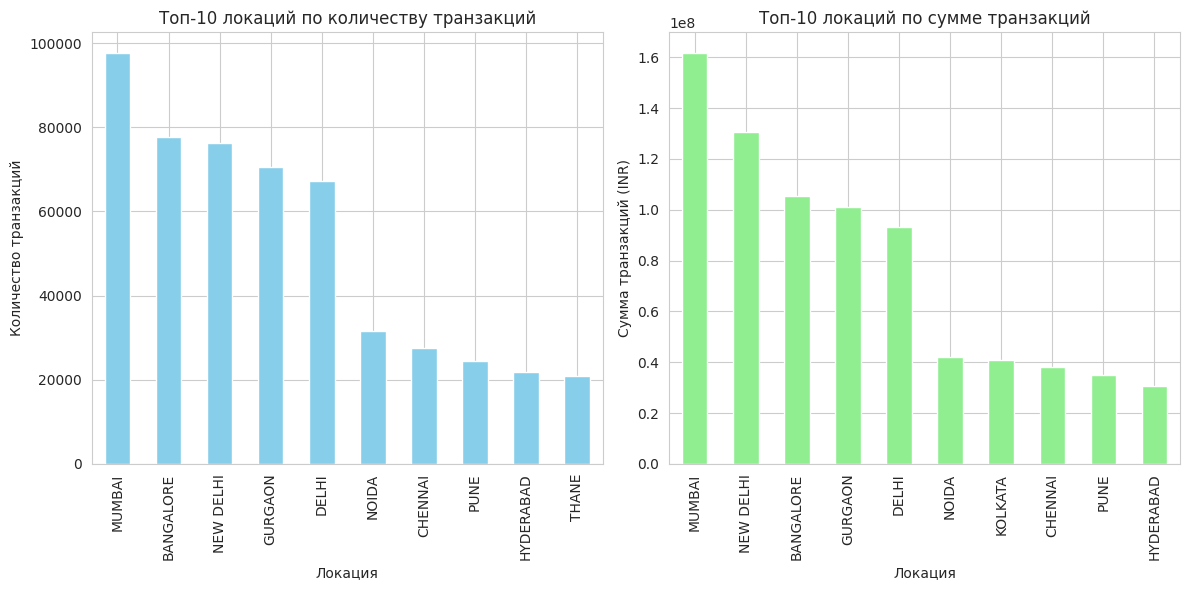

In [ ]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

# Анализ распределения транзакций по локации
# Топ-10 по количеству транзакций
top_locations_count = df["custLocation"].value_counts().head(10)
print("\nТоп-10 локаций по количеству транзакций:")
print(top_locations_count)

# Топ-10 по сумме транзакций
top_locations_sum = df.groupby("custLocation")["transactionAmountINR"].sum().sort_values(ascending=False).head(10)
print("\nТоп-10 локаций по сумме транзакций:")
print(top_locations_sum)

# Визуализация топ-10 локаций
plt.figure(figsize=(12, 6))

# График количества транзакций
plt.subplot(1, 2, 1)
top_locations_count.plot(kind='bar', color='skyblue')
plt.title("Топ-10 локаций по количеству транзакций")
plt.xlabel("Локация")
plt.ylabel("Количество транзакций")

# График суммы транзакций
plt.subplot(1, 2, 2)
top_locations_sum.plot(kind='bar', color='lightgreen')
plt.title("Топ-10 локаций по сумме транзакций")
plt.xlabel("Локация")
plt.ylabel("Сумма транзакций (INR)")

plt.tight_layout()
plt.show()


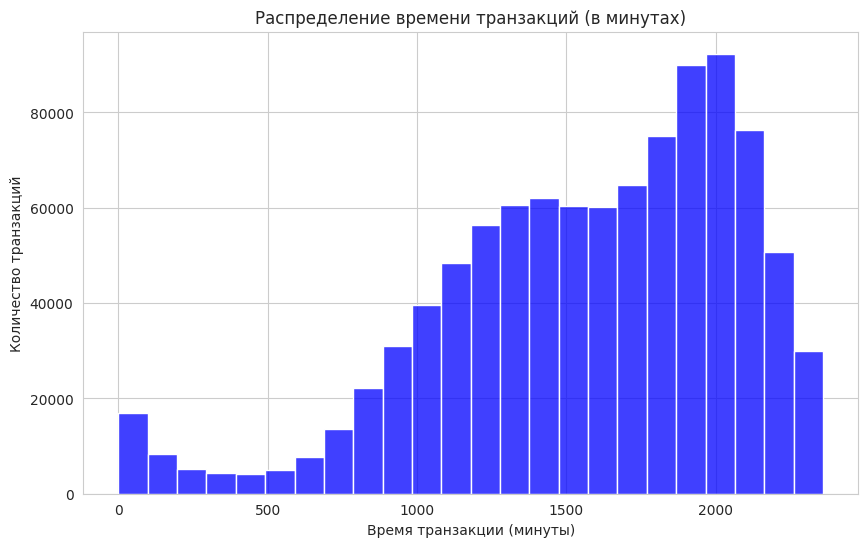

In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

# Анализ распределения времени транзакции
# Перевод времени из миллисекунд в минуты
df["transactionTimeMinutes"] = df["transactionTime"] // 100

# Распределение времени транзакции
plt.figure(figsize=(10, 6))
sns.histplot(df["transactionTimeMinutes"], bins=24, kde=False, color="blue")
plt.title("Распределение времени транзакций (в минутах)")
plt.xlabel("Время транзакции (минуты)")
plt.ylabel("Количество транзакций")
plt.show()



# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1. Распределение по локациям:

Наиболее активные регионы по количеству транзакций и их суммам включают такие города, как Мумбаи, Нью-Дели и другие крупные мегаполисы.
Топ-10 локаций по количеству транзакций существенно коррелируют с топ-10 локациями по общей сумме транзакций.

2. Возрастная структура клиентов:

Основная масса клиентов находится в возрастной категории 26-45 лет, что указывает на платежеспособность этого сегмента.
Группа 36-45 лет имеет самые высокие средние балансы на счетах.

3. Гендерное распределение:

Доля женщин в клиентской базе примерно равна доле мужчин, однако активность по транзакциям выше среди мужчин.

4. Активность клиентов во времени:

Пик времени транзакций (после перевода данных из миллисекунд в минуты) приходится на рабочие часы (10:00–15:00).
Это указывает на то, что клиенты преимущественно совершают операции в течение рабочего дня.

5. Распределение сумм транзакций:

Большинство транзакций имеют небольшие суммы (до 1000 INR), однако присутствуют редкие крупные транзакции, которые значительно увеличивают общую сумму.
Это может свидетельствовать о распределении клиентов на массовый и премиальный сегменты.

6. Пропуски и дубли:

Данные были очищены от пропусков и дублей, что позволило улучшить качество анализа.

NameError: name 'unique_customers' is not defined